# <Center> Diffusion Processes on Complex Networks - Lab 4</Center>

## <center> Roman Furman </center>

In [1]:
import imageio
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import warnings
warnings.filterwarnings("ignore")

# 1

In [2]:
def random_walk(num_steps: int, file_prefix: str) -> None:
    """
    Simulates a 2D random walk with num_steps steps, saves a snapshot of the walk at every step 
    as a png file with the file_prefix, and then creates a gif animation from the saved images.
    
    Args:
    - num_steps: an integer specifying the number of steps in the random walk.
    - file_prefix: a string representing the prefix of the image and gif files. The files will be 
                   named as file_prefix_0000.png, file_prefix_0001.png, etc., and the gif will be
                   named as file_prefix.gif.
                   
    Returns:
    - None.  Saves a series of PNG files and a GIF file.
    """
    u = 2*np.random.randint(0,2,size=(num_steps,2))-1
    walks_cum_sum = np.cumsum(u,axis=0)
    images = []
    for i in range(num_steps):
        plt.plot(walks_cum_sum[:i,0],walks_cum_sum[:i,1])
        filename = f"{file_prefix}_{i:04d}.png"
        plt.savefig(filename, dpi=300)
        images.append(imageio.imread(filename))
        plt.close()
    imageio.mimsave(f"{file_prefix}.gif", images, fps=10)

In [4]:
random_walk(50, "r_w")

In [20]:
class Agent:
    """
    A class representing an agent that can move on a lattice.

    Attributes:
    -----------
    x : int
        The x-coordinate of the agent's position.
    y : int
        The y-coordinate of the agent's position.
    """
    def __init__(self, x=0, y=0):
        """
        Initializes the Agent class with the given x and y coordinates.

        Parameters:
        -----------
        x : int, optional
            The initial x-coordinate of the agent's position. Default is 0.
        y : int, optional
            The initial y-coordinate of the agent's position. Default is 0.
        """
        self.x = x
        self.y = y

    def move(self):
        """
        Moves the agent randomly in one of the four cardinal directions
        (up, down, left, right).
        """
        #u = 2*np.random.randint(0,2,size=(1,2))-1
        #self.x += u[0,0]
        #self.y += u[0,1]
        dx, dy = np.random.choice([-1, 0, 1], size=2)
        self.x += dx
        self.y += dy

In [21]:
def simulate_random_walk(num_steps: int, latise_size: int = None, file_prefix: str = "random_walk") -> None:
    """
    Simulate a random walk of an agent on a square lattice. The program takes a snapshot of the lattice in 
    every time step and saves it to a jpg or png file. These files are then used to generate a movie 
    (avi or animated gif).
    
    Args:
    - num_steps (int): Number of steps for the random walk.
    - latise_size (int): Size of the lattice. Default is None, which sets the lattice size equal to num_steps.
    - file_prefix (str): Prefix to be used in the file names. Default is "random_walk".
    
    Returns: None 
    Saves a series of PNG files and a GIF file.
    """
    if latise_size is None:
        latise_size = num_steps
    agent = Agent(x=latise_size//2, y=latise_size//2)
    lattice = np.zeros((latise_size,latise_size))
    lattice[agent.x, agent.y] = 1
    images = []
    for i in range(num_steps):
        agent.move()
        if 0 <= agent.x < latise_size and 0 <= agent.y < latise_size:
            lattice[agent.x, agent.y] += 1
        plt.imshow(lattice, cmap='hot')
        plt.axis('off')
        filename = f"{file_prefix}_{i:04d}.png"
        plt.savefig(filename, dpi=300)
        images.append(imageio.imread(filename))
        plt.close()
    imageio.mimsave(f"{file_prefix}.gif", images, fps=10)


In [22]:
simulate_random_walk(40)

# 2

# 2

In [33]:
N = 1000
num_walks = 10000

In [34]:
def pearson_random_walk(N, num_walks):
    # Simulate random walks
    A = np.zeros(num_walks)
    B = np.zeros(num_walks)
    for i in range(num_walks):
        x = 0
        y = 0
        for j in range(N):
            theta = np.random.uniform(0, 2*np.pi)
            x += np.cos(theta)
            y += np.sin(theta)
            if x > 0:
                A[i] += 1
            if x > 0 and y > 0:
                B[i] += 1
    return A/N, B/N

In [35]:
A_N, B_N = pearson_random_walk(N, num_walks)

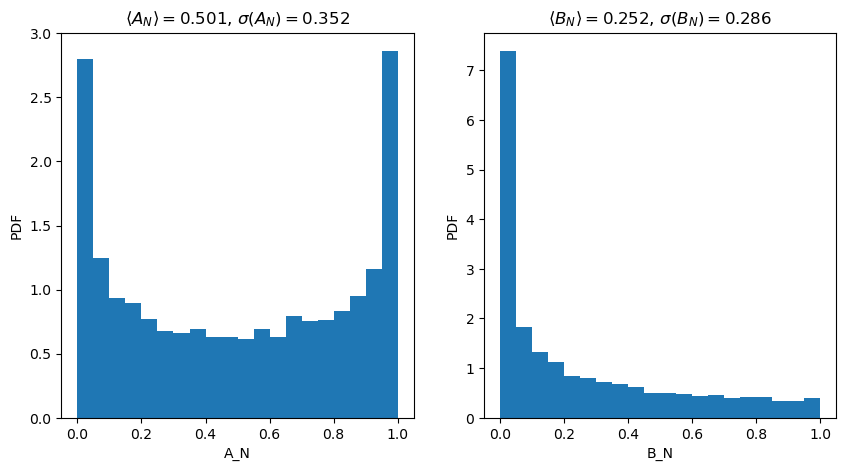

In [36]:
# Compute histograms
A_hist, _ = np.histogram(A_N, bins=20, range=(0,1), density=True)
B_hist, _ = np.histogram(B_N, bins=20, range=(0,1), density=True)

# Compute means and standard deviations
A_mean = np.mean(A_N)
A_std = np.std(A_N)
B_mean = np.mean(B_N)
B_std = np.std(B_N)

# Plot histograms
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(A_N, bins=20, range=(0,1), density=True)
ax[0].set_xlabel('A_N')
ax[0].set_ylabel('PDF')
ax[0].set_title(r'$\langle A_N \rangle = {:.3f}$, $\sigma(A_N) = {:.3f}$'.format(A_mean, A_std))
ax[1].hist(B_N, bins=20, range=(0,1), density=True)
ax[1].set_xlabel('B_N')
ax[1].set_ylabel('PDF')
ax[1].set_title(r'$\langle B_N \rangle = {:.3f}$, $\sigma(B_N) = {:.3f}$'.format(B_mean, B_std))
plt.show()

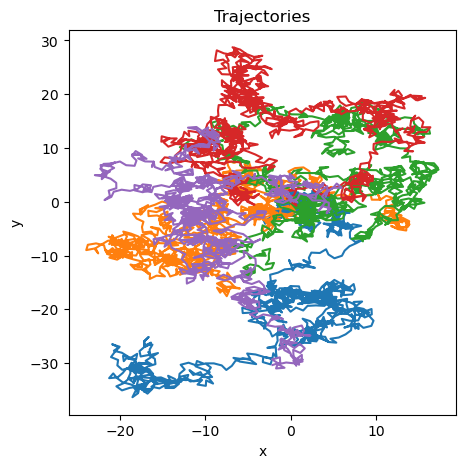

In [38]:
# Plot trajectories
fig, ax = plt.subplots(figsize=(5, 5))
for i in range(5):
    x = np.zeros(N+1)
    y = np.zeros(N+1)
    for j in range(N):
        theta = np.random.uniform(0, 2*np.pi)
        x[j+1] = x[j] + np.cos(theta)
        y[j+1] = y[j] + np.sin(theta)
    ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Trajectories')
plt.show()

# 3

In [44]:
def random_walk(graph, origin, num_steps, visualize=True):
    pos = nx.spring_layout(graph, seed=42)
    current_node = origin
    visited = {node: 0 for node in graph.nodes()}
    visited[origin] = 1
    images = []
    for i in range(num_steps):
        neighbors = list(graph.neighbors(current_node))
        next_node = random.choice(neighbors)
        visited[next_node] += 1
        current_node = next_node
        if visualize:
            fig, ax = plt.subplots()
            nx.draw_networkx_nodes(graph, pos, node_size=200, alpha=0.8,
                                   node_color=[visited[node] for node in graph.nodes()])
            nx.draw_networkx_edges(graph, pos, alpha=0.2)
            plt.axis('off')
            plt.title(f"Step {i+1}")
            filename = f"step_{i:04d}.png"
            plt.savefig(filename, dpi=300)
            images.append(imageio.imread(filename))
            plt.close()
    if visualize:
        imageio.mimsave('random_walk.gif', images, fps=10)
    return visited

# Example usage
G = nx.grid_2d_graph(5, 5)
origin = (2, 2)
visited = random_walk(G, origin, num_steps=20)
print("Visited nodes:", visited)

# Estimate average hitting times
N = 100  # increase for more accurate estimates
total_hits = {node: 0 for node in G.nodes()}
for i in range(N):
    visited = random_walk(G, origin, num_steps=N, visualize=False)
    for node, hits in visited.items():
        total_hits[node] += hits
avg_hits = {node: total_hits[node] / N for node in G.nodes()}
print("Average hitting times:", avg_hits)



Visited nodes: {(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (1, 0): 0, (1, 1): 0, (1, 2): 0, (1, 3): 0, (1, 4): 0, (2, 0): 0, (2, 1): 2, (2, 2): 3, (2, 3): 3, (2, 4): 2, (3, 0): 0, (3, 1): 0, (3, 2): 0, (3, 3): 3, (3, 4): 5, (4, 0): 0, (4, 1): 0, (4, 2): 0, (4, 3): 0, (4, 4): 3}
Average hitting times: {(0, 0): 2.22, (0, 1): 3.1, (0, 2): 3.3, (0, 3): 3.78, (0, 4): 2.45, (1, 0): 3.5, (1, 1): 4.53, (1, 2): 4.62, (1, 3): 5.06, (1, 4): 3.66, (2, 0): 3.77, (2, 1): 5.46, (2, 2): 6.5, (2, 3): 5.3, (2, 4): 3.84, (3, 0): 4.16, (3, 1): 5.52, (3, 2): 5.7, (3, 3): 4.97, (3, 4): 3.39, (4, 0): 2.67, (4, 1): 3.87, (4, 2): 3.9, (4, 3): 3.46, (4, 4): 2.27}
